Cleaning and creating multiple data frames for later modeling.

In [143]:
library("MASS")
library("olsrr")
source("vif_function.r")

In [144]:
Carcrash = read.csv("Nashville.csv")
head(Carcrash[c(3,4,5,6,7,8,9,10,14)])

,Number.of.Motor.Vehicles,Number.of.Injuries,Number.of.Fatalities,Property.Damage,Hit.and.Run,Collision.Type.Description,Weather.Description,Illumination.Description,Precinct
,<int>,<int>,<int>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
1,2,2,0,,N,ANGLE,NO ADVERSE CONDITIONS,,NORTH
2,1,1,0,,N,NOT COLLISION W/MOTOR VEHICLE-TRANSPORT,NO ADVERSE CONDITIONS,,NORTH
3,1,1,0,,N,HEAD-ON,NO ADVERSE CONDITIONS,,
4,2,0,0,,Y,REAR END,NO ADVERSE CONDITIONS,,
5,2,1,0,,N,Front to Rear,CLEAR,DAYLIGHT,EAST
6,2,0,0,,N,Front to Rear,CLEAR,DAYLIGHT,SOUTH


In [145]:
#Carcrash_clean_temp = na.omit(Carcrash[c(3,4,5,6,7,8,9,10,14)])
#head(Carcrash_clean)

#Carcrash_clean = data.frame()
#for (i in 1:nrow(Carcrash_clean_temp)) {
#    if (i%%5 == 0) {
#        Carcrash_clean = rbind(Carcrash_clean,Carcrash_clean_temp[i,])
#    }
#}

Carcrash_clean = na.omit(Carcrash[c(3,4,5,6,7,8,9,10,14)])

In [146]:
for (i in 1:length(Carcrash_clean$Property.Damage)) {
    if (Carcrash_clean$Property.Damage[i] != 'Y') {
        Carcrash_clean$Property.Damage[i] <- 'N'
        #print(Carcrash_clean$Property.Damage[i])
        
    }   
}

In [147]:
Carcrash_clean$Hit.and.Run <- as.factor(Carcrash_clean$Hit.and.Run)
Carcrash_clean$Collision.Type.Description <- as.factor(Carcrash_clean$Collision.Type.Description)
Carcrash_clean$Weather.Description <- as.factor(Carcrash_clean$Weather.Description)
Carcrash_clean$Illumination.Description <- as.factor(Carcrash_clean$Illumination.Description)
Carcrash_clean$Precinct <- as.factor(Carcrash_clean$Precinc)
#Carcrash_clean$HarmfulDescriptions <- as.factor(Carcrash_clean$HarmfulDescriptions)
Carcrash_clean$Property.Damage <- as.factor(Carcrash_clean$Property.Damage)
head(Carcrash_clean)

,Number.of.Motor.Vehicles,Number.of.Injuries,Number.of.Fatalities,Property.Damage,Hit.and.Run,Collision.Type.Description,Weather.Description,Illumination.Description,Precinct
,<int>,<int>,<int>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>
1,2,2,0,N,N,ANGLE,NO ADVERSE CONDITIONS,,NORTH
2,1,1,0,N,N,NOT COLLISION W/MOTOR VEHICLE-TRANSPORT,NO ADVERSE CONDITIONS,,NORTH
3,1,1,0,N,N,HEAD-ON,NO ADVERSE CONDITIONS,,
4,2,0,0,N,Y,REAR END,NO ADVERSE CONDITIONS,,
5,2,1,0,N,N,Front to Rear,CLEAR,DAYLIGHT,EAST
6,2,0,0,N,N,Front to Rear,CLEAR,DAYLIGHT,SOUTH


In [148]:
Carcrash_clean2 <- Carcrash_clean

In [149]:
Carcrash_clean3 <- Carcrash_clean

In [150]:
for (i in 1:length(Carcrash_clean2$Number.of.Fatalities)) {
    if (Carcrash_clean2$Number.of.Fatalities[i] >= 1) {
        Carcrash_clean2$Number.of.Fatalities[i] = 1
        #print(Carcrash_clean$Property.Damage[i])
        
    }   
}

In [151]:
for (i in 1:length(Carcrash_clean3$Number.of.Injuries)) {
    if (Carcrash_clean3$Number.of.Injuries[i] >= 1) {
        Carcrash_clean3$Number.of.Injuries[i] = 1
        #print(Carcrash_clean$Property.Damage[i])
        
    }   
}

First linear and glm models for looking at the results and getting rid of things that have no coralation.

MLRS

In [152]:
fatality_lm_full = lm(Number.of.Fatalities ~ Number.of.Motor.Vehicles + Number.of.Injuries + Property.Damage + Hit.and.Run + Collision.Type.Description + Weather.Description + Illumination.Description + Precinct, data = Carcrash_clean)
summary(fatality_lm_full)


Call:
lm(formula = Number.of.Fatalities ~ Number.of.Motor.Vehicles + 
    Number.of.Injuries + Property.Damage + Hit.and.Run + Collision.Type.Description + 
    Weather.Description + Illumination.Description + Precinct, 
    data = Carcrash_clean)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.06125 -0.00586 -0.00171  0.00019  2.99833 

Coefficients:
                                                                    Estimate
(Intercept)                                                       -8.385e-03
Number.of.Motor.Vehicles                                          -2.442e-05
Number.of.Injuries                                                 1.455e-03
Property.DamageY                                                  -6.847e-03
Hit.and.RunN                                                       4.582e-03
Hit.and.RunY                                                       2.677e-03
Collision.Type.DescriptionANGLE                                   -5.906e-03
Collision.Type.D

In [153]:
injury_lm_full = lm(Number.of.Injuries ~ Number.of.Motor.Vehicles + Number.of.Fatalities + Property.Damage + Hit.and.Run + Collision.Type.Description + Weather.Description + Illumination.Description + Precinct, data = Carcrash_clean)
summary(injury_lm_full)


Call:
lm(formula = Number.of.Injuries ~ Number.of.Motor.Vehicles + 
    Number.of.Fatalities + Property.Damage + Hit.and.Run + Collision.Type.Description + 
    Weather.Description + Illumination.Description + Precinct, 
    data = Carcrash_clean)

Residuals:
    Min      1Q  Median      3Q     Max 
-1.5431 -0.4909 -0.2537  0.4007 11.5053 

Coefficients:
                                                                   Estimate
(Intercept)                                                        0.248119
Number.of.Motor.Vehicles                                           0.036626
Number.of.Fatalities                                               0.195270
Property.DamageY                                                   0.033278
Hit.and.RunN                                                      -0.377682
Hit.and.RunY                                                      -0.639859
Collision.Type.DescriptionANGLE                                    0.544515
Collision.Type.DescriptionFront to

GLMS

In [154]:
fatality_glm_full = glm(Number.of.Fatalities ~ Number.of.Motor.Vehicles + Number.of.Injuries + Property.Damage + Hit.and.Run + Collision.Type.Description + Weather.Description + Illumination.Description + Precinct, data = Carcrash_clean2, family = "binomial")
summary(fatality_glm_full)

Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”



Call:
glm(formula = Number.of.Fatalities ~ Number.of.Motor.Vehicles + 
    Number.of.Injuries + Property.Damage + Hit.and.Run + Collision.Type.Description + 
    Weather.Description + Illumination.Description + Precinct, 
    family = "binomial", data = Carcrash_clean2)

Coefficients:
                                                                    Estimate
(Intercept)                                                       -5.279e+01
Number.of.Motor.Vehicles                                          -3.174e-02
Number.of.Injuries                                                 2.361e-01
Property.DamageY                                                  -8.515e-01
Hit.and.RunN                                                       1.565e+01
Hit.and.RunY                                                       1.511e+01
Collision.Type.DescriptionANGLE                                   -1.611e+01
Collision.Type.DescriptionFront to Rear                           -1.703e+01
Collision.Type.Descr

In [155]:
injury_glm_full = glm(Number.of.Injuries ~ Number.of.Motor.Vehicles + Number.of.Fatalities + Property.Damage + Hit.and.Run + Collision.Type.Description + Weather.Description + Illumination.Description + Precinct, data = Carcrash_clean3, family = "binomial")
summary(injury_glm_full)


Call:
glm(formula = Number.of.Injuries ~ Number.of.Motor.Vehicles + 
    Number.of.Fatalities + Property.Damage + Hit.and.Run + Collision.Type.Description + 
    Weather.Description + Illumination.Description + Precinct, 
    family = "binomial", data = Carcrash_clean3)

Coefficients:
                                                                    Estimate
(Intercept)                                                       -1.797e+01
Number.of.Motor.Vehicles                                           1.317e-02
Number.of.Fatalities                                              -4.944e-02
Property.DamageY                                                  -9.513e-02
Hit.and.RunN                                                       7.914e-02
Hit.and.RunY                                                      -7.816e-01
Collision.Type.DescriptionANGLE                                    1.701e+01
Collision.Type.DescriptionFront to Rear                            1.684e+01
Collision.Type.Descr

Models with reduced features for relavance and increased comprehension.

MLRS

In [156]:
injury_lm = lm(Number.of.Injuries ~ Number.of.Motor.Vehicles + Number.of.Fatalities + Property.Damage + Hit.and.Run + Collision.Type.Description + Weather.Description, data = Carcrash_clean)
summary(injury_lm)


Call:
lm(formula = Number.of.Injuries ~ Number.of.Motor.Vehicles + 
    Number.of.Fatalities + Property.Damage + Hit.and.Run + Collision.Type.Description + 
    Weather.Description, data = Carcrash_clean)

Residuals:
    Min      1Q  Median      3Q     Max 
-1.5183 -0.5026 -0.2710  0.4004 11.4978 

Coefficients:
                                                                   Estimate
(Intercept)                                                        0.304722
Number.of.Motor.Vehicles                                           0.035169
Number.of.Fatalities                                               0.218884
Property.DamageY                                                   0.033457
Hit.and.RunN                                                      -0.366700
Hit.and.RunY                                                      -0.615027
Collision.Type.DescriptionANGLE                                    0.587954
Collision.Type.DescriptionFront to Rear                            0.490983
C

In [157]:
fatality_lm = lm(Number.of.Fatalities ~ Number.of.Injuries + Property.Damage + Weather.Description + Illumination.Description, data = Carcrash_clean)
summary(fatality_lm)


Call:
lm(formula = Number.of.Fatalities ~ Number.of.Injuries + Property.Damage + 
    Weather.Description + Illumination.Description, data = Carcrash_clean)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.04978 -0.00657 -0.00170 -0.00170  2.99629 

Coefficients:
                                                Estimate Std. Error t value
(Intercept)                                   -0.0001468  0.0006059  -0.242
Number.of.Injuries                             0.0020021  0.0001999  10.018
Property.DamageY                               0.0011130  0.0005660   1.966
Weather.DescriptionBLOWING SAND/SOIL/DIRT      0.0015943  0.0642698   0.025
Weather.DescriptionBLOWING SNOW               -0.0004463  0.0083977  -0.053
Weather.DescriptionCLEAR                       0.0053003  0.0007375   7.187
Weather.DescriptionCLOUDY                      0.0045139  0.0008310   5.432
Weather.DescriptionFOG                         0.0023667  0.0038568   0.614
Weather.DescriptionNO ADVERSE CONDITION

GLMS

In [158]:
fatality_glm = glm(Number.of.Fatalities ~ Property.Damage + Number.of.Injuries, data = Carcrash_clean2, family = "binomial")
summary(fatality_glm)


Call:
glm(formula = Number.of.Fatalities ~ Property.Damage + Number.of.Injuries, 
    family = "binomial", data = Carcrash_clean2)

Coefficients:
                   Estimate Std. Error z value Pr(>|z|)    
(Intercept)        -5.87585    0.04890 -120.17  < 2e-16 ***
Property.DamageY    0.43868    0.12427    3.53 0.000416 ***
Number.of.Injuries  0.33675    0.03184   10.58  < 2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 8221.7  on 176322  degrees of freedom
Residual deviance: 8131.3  on 176320  degrees of freedom
AIC: 8137.3

Number of Fisher Scoring iterations: 8


In [159]:
Injury_glm = glm(Number.of.Injuries ~ Number.of.Motor.Vehicles + Number.of.Fatalities + Property.Damage + Weather.Description + Illumination.Description, data = Carcrash_clean3, family = "binomial")
summary(Injury_glm)


Call:
glm(formula = Number.of.Injuries ~ Number.of.Motor.Vehicles + 
    Number.of.Fatalities + Property.Damage + Weather.Description + 
    Illumination.Description, family = "binomial", data = Carcrash_clean3)

Coefficients:
                                               Estimate Std. Error z value
(Intercept)                                   -4.909125   0.114142 -43.009
Number.of.Motor.Vehicles                      -0.034528   0.006288  -5.491
Number.of.Fatalities                           0.282552   0.075826   3.726
Property.DamageY                               0.055983   0.019643   2.850
Weather.DescriptionBLOWING SAND/SOIL/DIRT      9.511315  43.953958   0.216
Weather.DescriptionBLOWING SNOW               -0.984743   0.382003  -2.578
Weather.DescriptionCLEAR                       0.118690   0.025637   4.630
Weather.DescriptionCLOUDY                      0.094035   0.028742   3.272
Weather.DescriptionFOG                        -0.016090   0.131587  -0.122
Weather.DescriptionNO 

TESTS

In [160]:
vif(fatality_lm)

,GVIF,Df,GVIF^(1/(2*Df))
Number.of.Injuries,1.023017,1,1.011443
Property.Damage,1.019065,1,1.009488
Weather.Description,3.993080,13,1.054696
Illumination.Description,4.069652,8,1.091685


In [161]:
vif(injury_lm)

,GVIF,Df,GVIF^(1/(2*Df))
Number.of.Motor.Vehicles,1.206322,1,1.098327
Number.of.Fatalities,1.007408,1,1.003697
Property.Damage,1.309490,1,1.144330
Hit.and.Run,1.099298,2,1.023950
Collision.Type.Description,5.089924,12,1.070154
Weather.Description,3.272203,13,1.046650


In [162]:
reg_fatality = ols_step_best_subset(fatality_lm, metric = "rsquare")
reg_fatality

,mindex,n,predictors,rsquare,adjr,predrsq,cp,aic,sbic,sbc,msep,fpe,apc,hsp
,<int>,<int>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
4,1,1,Illumination.Description,0.002294383,0.002249113,0.002202459,165.12413,-467354.5,-967751.5,-467253.7,728.8989,0.004134095,0.9977283,2.344628e-08
7,2,2,Number.of.Injuries Illumination.Description,0.002879379,0.002828480,0.002748685,63.64419,-467455.9,-967852.9,-467345.0,728.4756,0.004131718,0.9971546,2.343280e-08
13,3,3,Number.of.Injuries Weather.Description Illumination.Description,0.003319072,0.003194699,-Inf,-12.13324,-467507.6,-967928.6,-467265.7,728.1585,0.004130224,0.9967261,2.342433e-08
15,4,4,Number.of.Injuries Property.Damage Weather.Description Illumination.Description,0.003340932,0.003210908,-Inf,-14.00000,-467509.5,-967930.5,-467257.5,728.1467,0.004130181,0.9967156,2.342408e-08


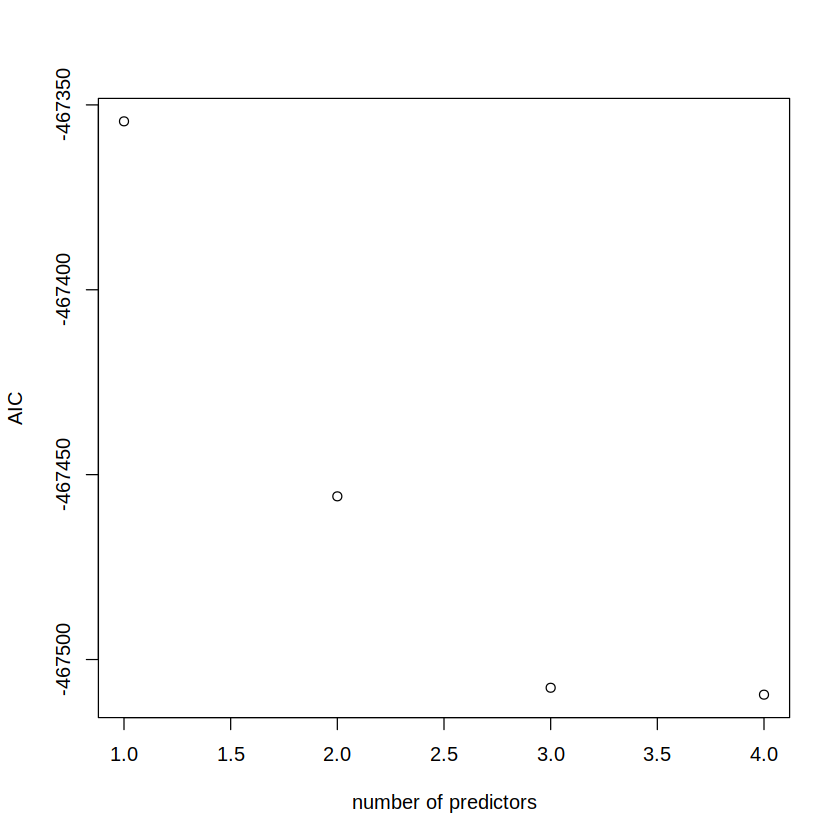

In [163]:
plot(x = 1:4, y = reg_fatality[,8], xlab = "number of predictors", ylab = "AIC")

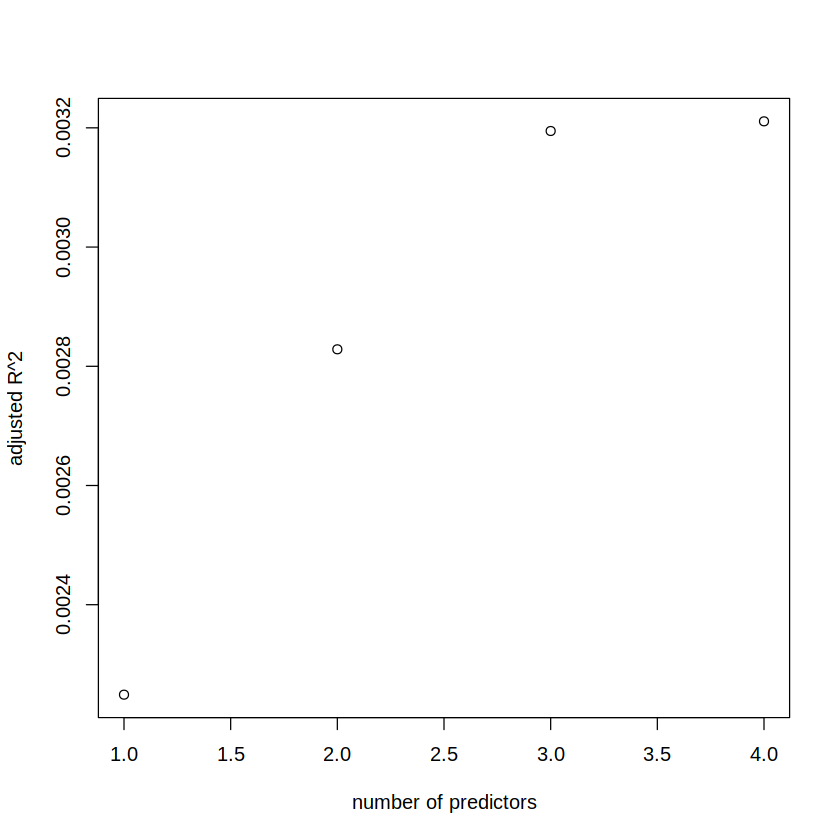

In [164]:
plot(x = 1:4, y = reg_fatality[,5], xlab = "number of predictors", ylab = "adjusted R^2")

In [165]:
reg_injury = ols_step_best_subset(injury_lm, metric = "rsquare")
reg_injury

,mindex,n,predictors,rsquare,adjr,predrsq,cp,aic,sbic,sbc,msep,fpe,apc,hsp
,<int>,<int>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
5,1,1,Collision.Type.Description,0.05552932,0.05546504,-Inf,4074.927989,400236.0,-100169.1,400377.1,99902.58,0.5666302,0.9444921,3.213611e-06
19,2,2,Hit.and.Run Collision.Type.Description,0.07411237,0.07403884,-Inf,527.565830,396736.2,-103670.9,396897.4,97937.49,0.5554909,0.9259191,3.150434e-06
29,3,3,Number.of.Motor.Vehicles Hit.and.Run Collision.Type.Description,0.07531970,0.07524103,-Inf,298.964172,396508.1,-103898.9,396679.5,97810.33,0.5547728,0.9247223,3.146362e-06
51,4,4,Number.of.Motor.Vehicles Hit.and.Run Collision.Type.Description Weather.Description,0.07657995,0.07643329,-Inf,60.257228,396293.6,-104137.4,396596.0,97677.58,0.5540607,0.9234724,3.142323e-06
60,5,5,Number.of.Motor.Vehicles Number.of.Fatalities Hit.and.Run Collision.Type.Description Weather.Description,0.07689921,0.07674736,-Inf,1.278837,396234.6,-104196.4,396547.1,97644.37,0.5538755,0.9231636,3.141273e-06
63,6,6,Number.of.Motor.Vehicles Number.of.Fatalities Property.Damage Hit.and.Run Collision.Type.Description Weather.Description,0.07700538,0.07684831,-Inf,-17.000000,396216.4,-104214.6,396538.9,97633.69,0.5538180,0.9230679,3.140947e-06


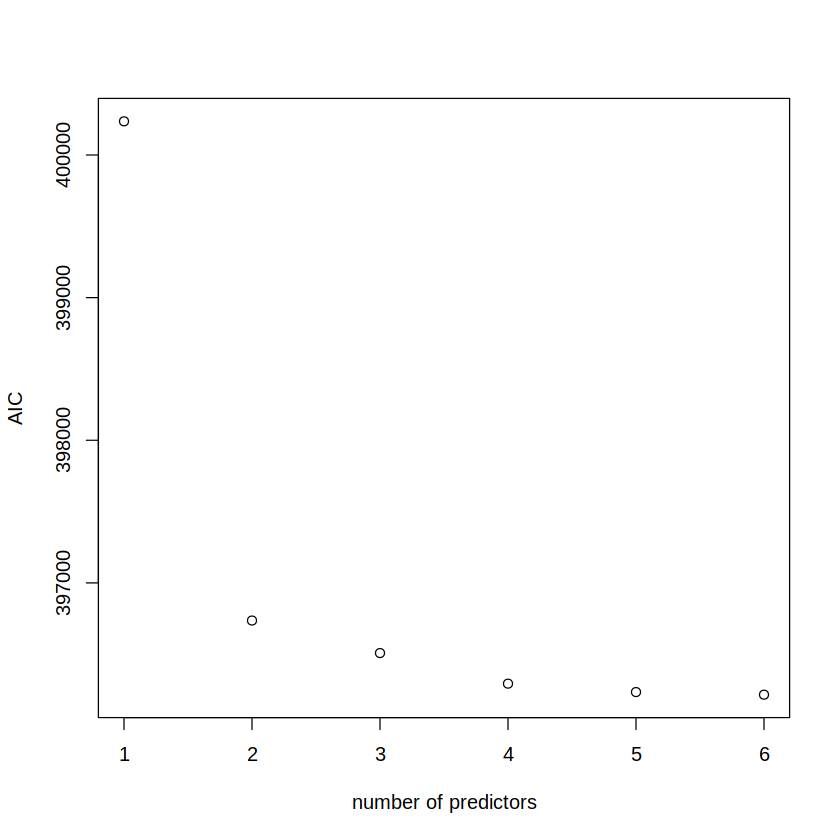

In [166]:
plot(x = 1:6, y = reg_injury[,8], xlab = "number of predictors", ylab = "AIC")

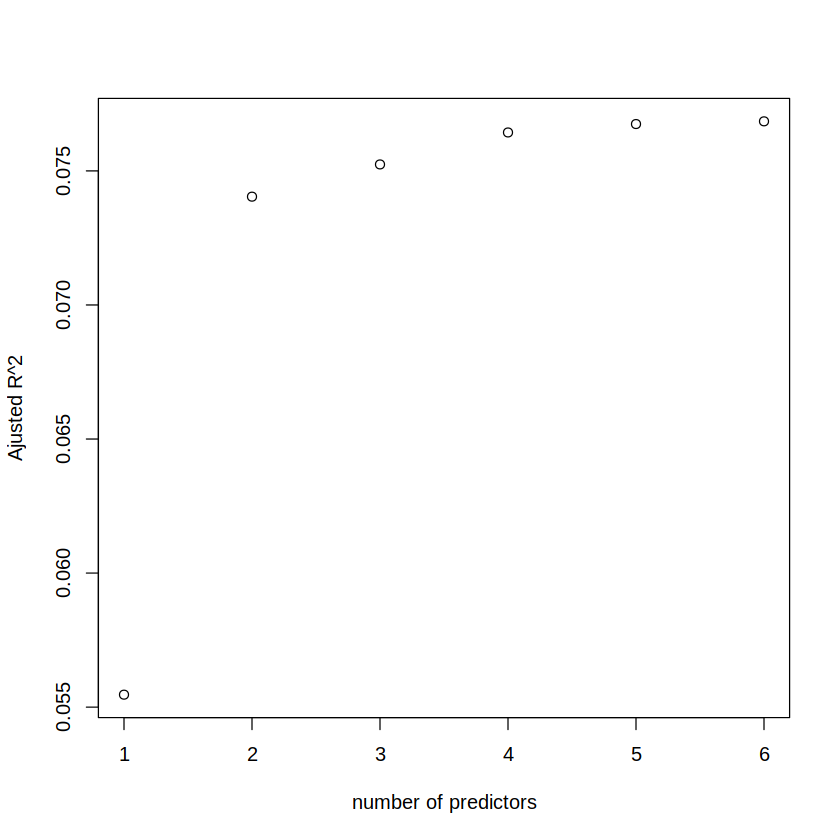

In [167]:
plot(x = 1:6, y = reg_injury[,5], xlab = "number of predictors", ylab = "Ajusted R^2")

In [168]:
fatality_add1 = lm(Number.of.Fatalities ~ Number.of.Motor.Vehicles + Number.of.Injuries + Property.Damage + Weather.Description + Illumination.Description, data = Carcrash_clean)
fatality_add2 = lm(Number.of.Fatalities ~ Hit.and.Run + Number.of.Injuries + Property.Damage + Weather.Description + Illumination.Description, data = Carcrash_clean)
fatality_add3 = lm(Number.of.Fatalities ~ Collision.Type.Description + Number.of.Injuries + Property.Damage + Weather.Description + Illumination.Description, data = Carcrash_clean)
fatality_add4 = lm(Number.of.Fatalities ~ Precinct + Number.of.Injuries + Property.Damage + Weather.Description + Illumination.Description, data = Carcrash_clean)

anova(fatality_lm, fatality_add1)
anova(fatality_lm, fatality_add2)
anova(fatality_lm, fatality_add3)
anova(fatality_lm, fatality_add4)

,Res.Df,RSS,Df,Sum of Sq,F,Pr(>F)
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,176299,728.1260,NA,NA,NA,NA
2,176298,727.7347,1,0.3913444,94.80548,2.127939e-22


,Res.Df,RSS,Df,Sum of Sq,F,Pr(>F)
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,176299,728.1260,NA,NA,NA,NA
2,176297,727.8923,2,0.2337567,28.30818,5.103746e-13


,Res.Df,RSS,Df,Sum of Sq,F,Pr(>F)
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,176299,728.1260,NA,NA,NA,NA
2,176287,724.1691,12,3.956968,80.27155,5.34064e-198


,Res.Df,RSS,Df,Sum of Sq,F,Pr(>F)
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,176299,728.126,NA,NA,NA,NA
2,176291,728.012,8,0.1140201,3.451302,0.0005546613


In [169]:
injury_add1 = lm(Number.of.Injuries ~ Illumination.Description + Number.of.Motor.Vehicles + Number.of.Fatalities + Property.Damage + Hit.and.Run + Collision.Type.Description + Weather.Description, data = Carcrash_clean)
injury_add2 = lm(Number.of.Injuries ~ Precinct + Number.of.Motor.Vehicles + Number.of.Fatalities + Property.Damage + Hit.and.Run + Collision.Type.Description + Weather.Description, data = Carcrash_clean)

anova(injury_lm, injury_add1)
anova(injury_lm, injury_add2)

,Res.Df,RSS,Df,Sum of Sq,F,Pr(>F)
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,176292,97629.81,NA,NA,NA,NA
2,176284,97426.09,8,203.7248,46.07777,1.151285e-74


,Res.Df,RSS,Df,Sum of Sq,F,Pr(>F)
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,176292,97629.81,NA,NA,NA,NA
2,176284,97380.54,8,249.2753,56.4066,2.638765e-92


In [170]:
fatality_glm_add1 = glm(Number.of.Fatalities ~ Number.of.Motor.Vehicles + Property.Damage + Number.of.Injuries, data = Carcrash_clean2, family = "binomial")
fatality_glm_add2 = glm(Number.of.Fatalities ~ Hit.and.Run + Property.Damage + Number.of.Injuries, data = Carcrash_clean2, family = "binomial")
fatality_glm_add3 = glm(Number.of.Fatalities ~ Collision.Type.Description + Property.Damage + Number.of.Injuries, data = Carcrash_clean2, family = "binomial")
fatality_glm_add4 = glm(Number.of.Fatalities ~ Weather.Description + Property.Damage + Number.of.Injuries, data = Carcrash_clean2, family = "binomial")
fatality_glm_add5 = glm(Number.of.Fatalities ~ Illumination.Description + Property.Damage + Number.of.Injuries, data = Carcrash_clean2, family = "binomial")
fatality_glm_add6 = glm(Number.of.Fatalities ~ Precinct + Property.Damage + Number.of.Injuries, data = Carcrash_clean2, family = "binomial")

anova(fatality_glm, fatality_glm_add1, test = "Chisq")
anova(fatality_glm, fatality_glm_add2, test = "Chisq")
anova(fatality_glm, fatality_glm_add3, test = "Chisq")
anova(fatality_glm, fatality_glm_add4, test = "Chisq")
anova(fatality_glm, fatality_glm_add5, test = "Chisq")
anova(fatality_glm, fatality_glm_add6, test = "Chisq")

,Resid. Df,Resid. Dev,Df,Deviance,Pr(>Chi)
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,176320,8131.334,NA,NA,NA
2,176319,7986.398,1,144.9364,2.217514e-33


,Resid. Df,Resid. Dev,Df,Deviance,Pr(>Chi)
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,176320,8131.334,NA,NA,NA
2,176318,8105.563,2,25.77086,2.534717e-06


,Resid. Df,Resid. Dev,Df,Deviance,Pr(>Chi)
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,176320,8131.334,NA,NA,NA
2,176308,7239.425,12,891.909,3.137393e-183


,Resid. Df,Resid. Dev,Df,Deviance,Pr(>Chi)
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,176320,8131.334,NA,NA,NA
2,176307,7978.945,13,152.3897,6.799008e-26


,Resid. Df,Resid. Dev,Df,Deviance,Pr(>Chi)
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,176320,8131.334,NA,NA,NA
2,176312,7774.739,8,356.5957,3.538642e-72


,Resid. Df,Resid. Dev,Df,Deviance,Pr(>Chi)
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,176320,8131.334,NA,NA,NA
2,176312,8090.723,8,40.6113,2.464058e-06


In [171]:
injury_glm_add1 = glm(Number.of.Injuries ~ Hit.and.Run + Number.of.Motor.Vehicles + Number.of.Fatalities + Property.Damage + Weather.Description + Illumination.Description, data = Carcrash_clean3, family = "binomial")
injury_glm_add2 = glm(Number.of.Injuries ~ Collision.Type.Description + Number.of.Motor.Vehicles + Number.of.Fatalities + Property.Damage + Weather.Description + Illumination.Description, data = Carcrash_clean3, family = "binomial")
injury_glm_add3 = glm(Number.of.Injuries ~ Precinct + Number.of.Motor.Vehicles + Number.of.Fatalities + Property.Damage + Weather.Description + Illumination.Description, data = Carcrash_clean3, family = "binomial")

anova(injury_glm, injury_glm_add1, test = "Chisq")
anova(injury_glm, injury_glm_add2, test = "Chisq")
anova(injury_glm, injury_glm_add3, test = "Chisq")

,Resid. Df,Resid. Dev,Df,Deviance,Pr(>Chi)
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,176276,191805.4,NA,NA,NA
2,176296,198223.6,-20,-6418.215,0


,Resid. Df,Resid. Dev,Df,Deviance,Pr(>Chi)
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,176276,191805.4,NA,NA,NA
2,176286,195862.3,-10,-4056.909,0


,Resid. Df,Resid. Dev,Df,Deviance,Pr(>Chi)
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,176276,191805.4,NA,NA,NA
2,176290,203069.7,-14,-11264.28,0


Warning message:
“not plotting observations with leverage one:
  158859”


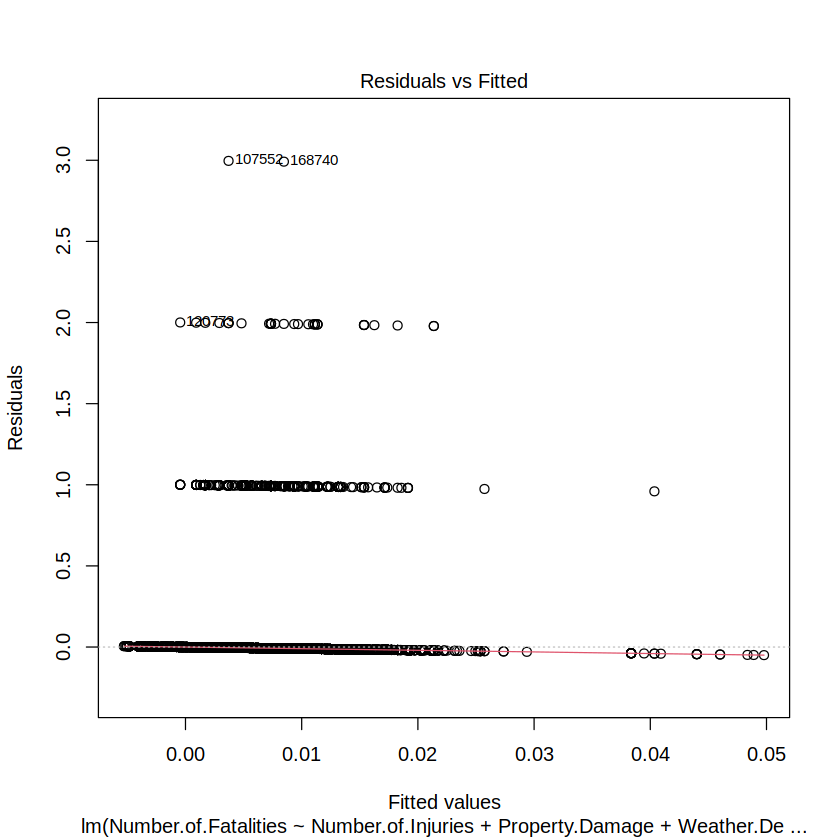

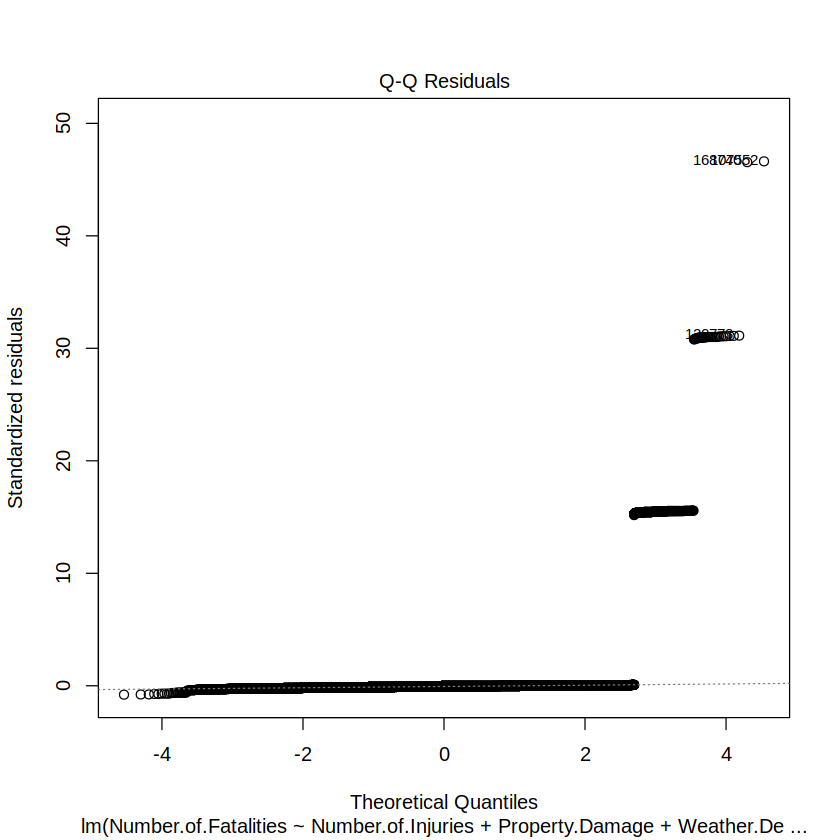

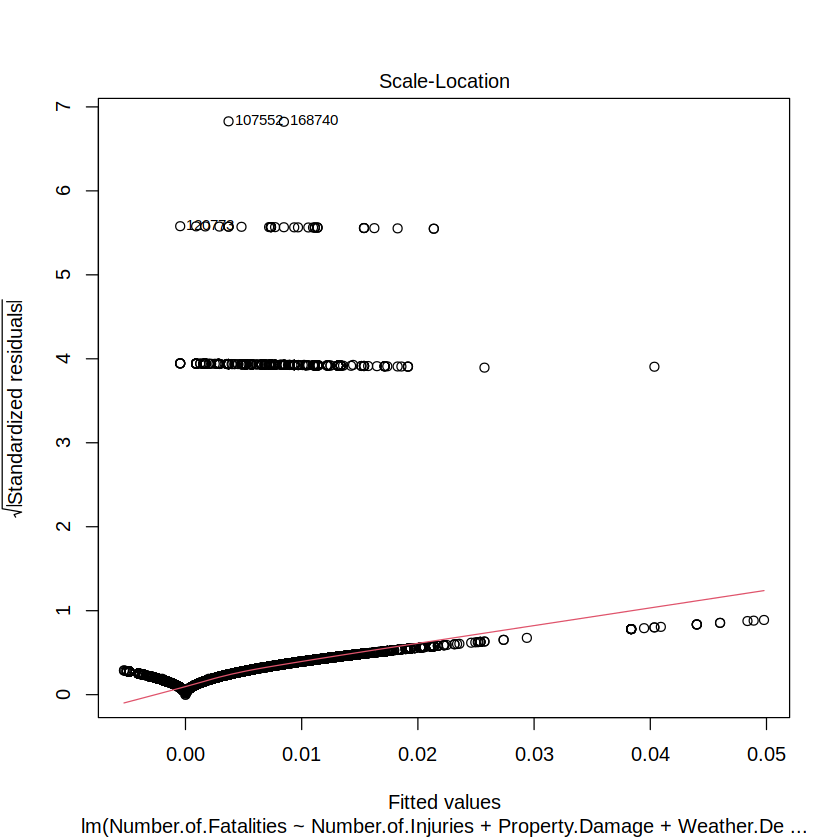

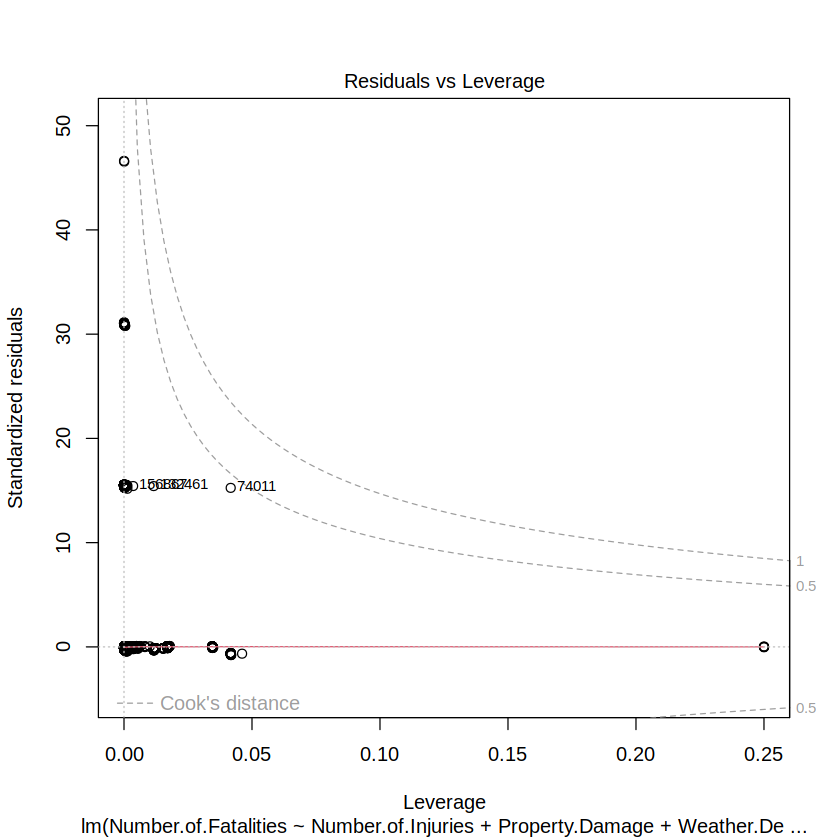

In [172]:
plot(fatality_lm)

Warning message:
“not plotting observations with leverage one:
  158859, 176323”


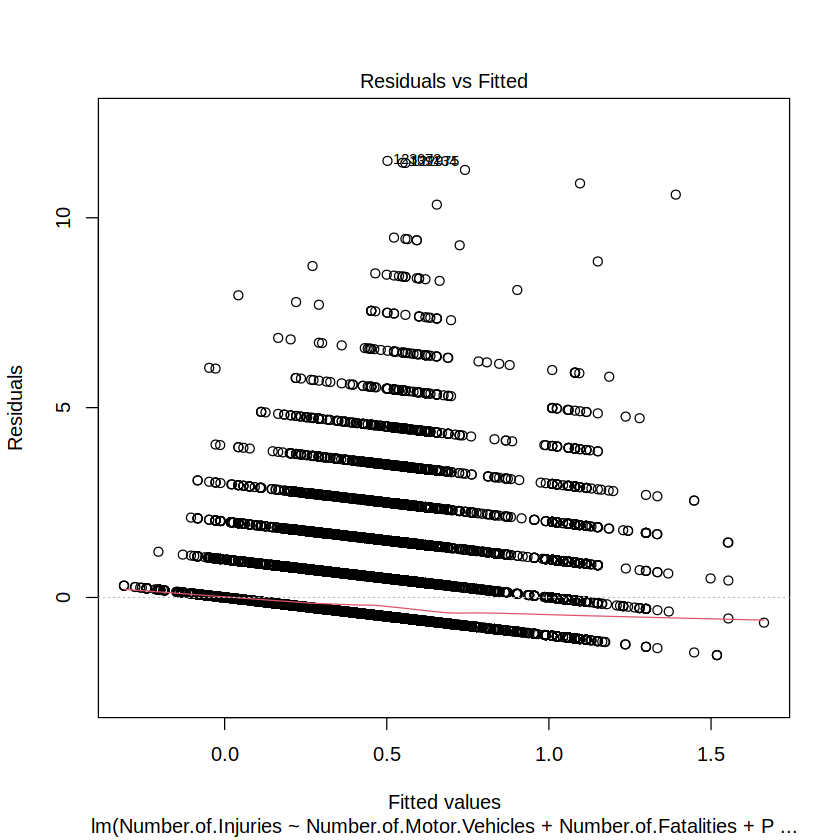

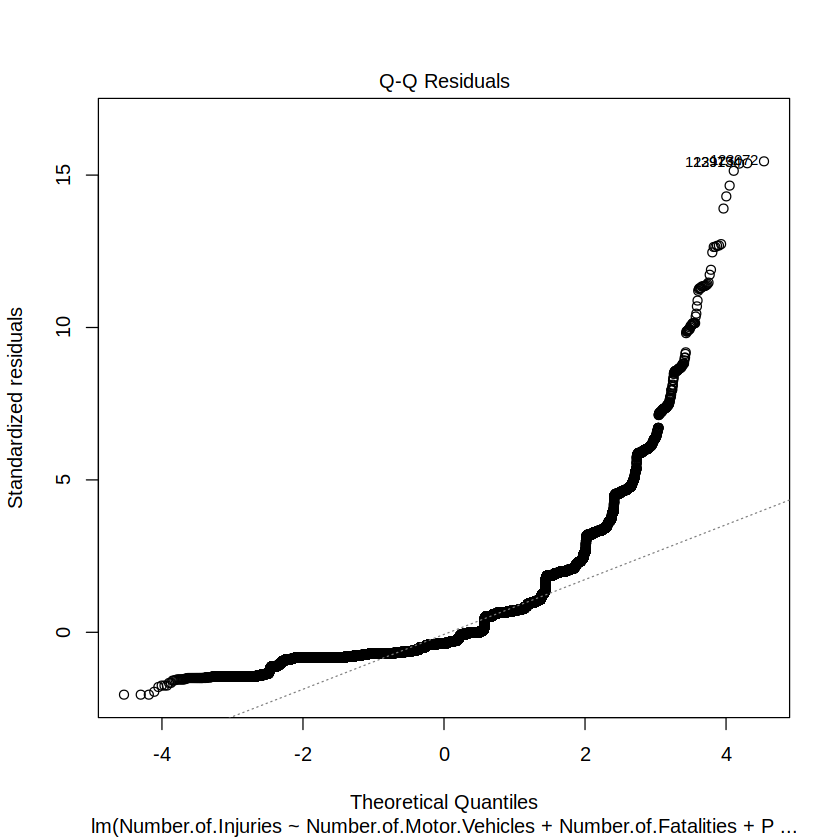

Warning message in sqrt(crit * p * (1 - hh)/hh):
“NaNs produced”
Warning message in sqrt(crit * p * (1 - hh)/hh):
“NaNs produced”


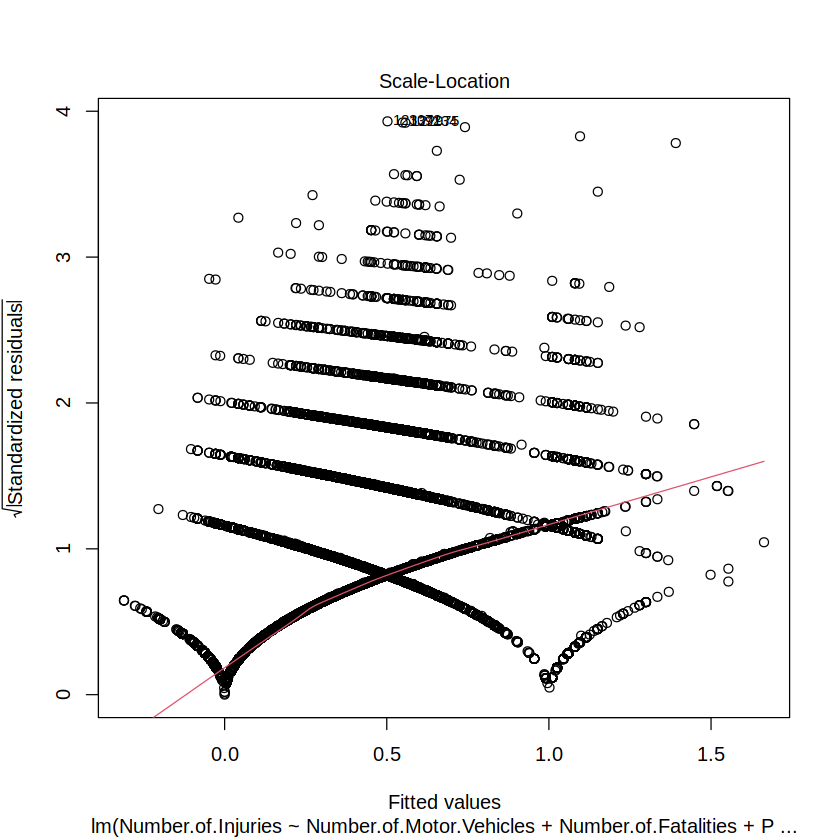

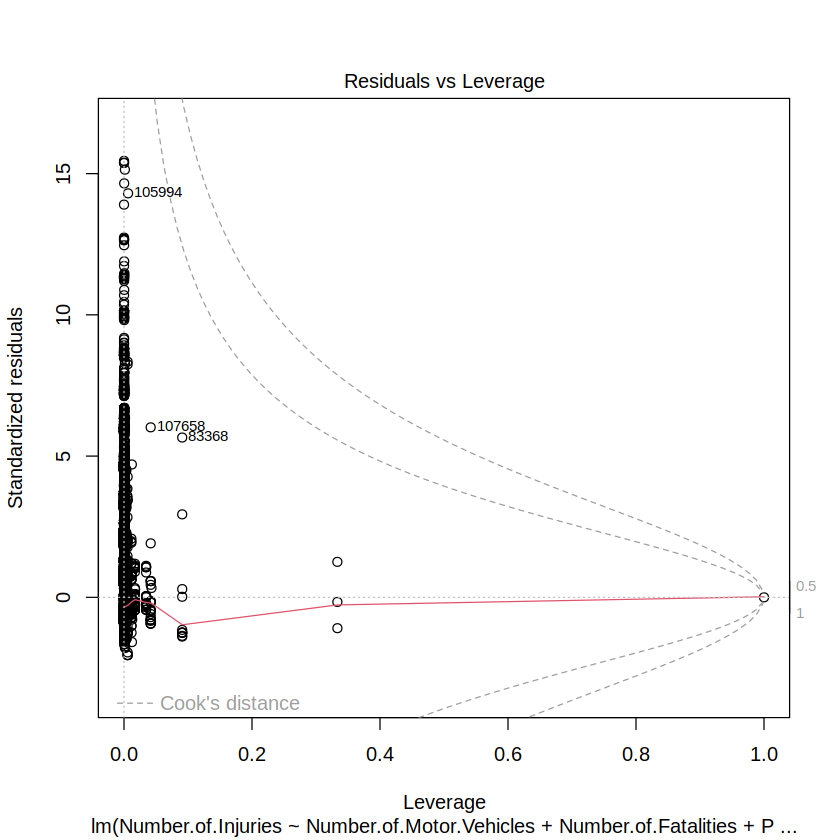

In [173]:
plot(injury_lm)

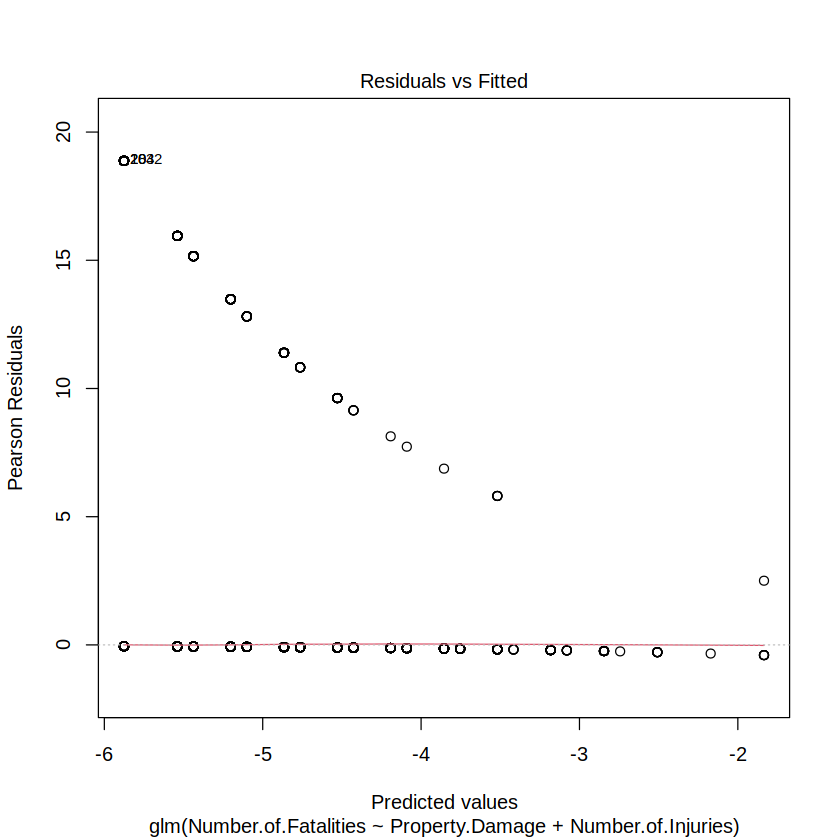

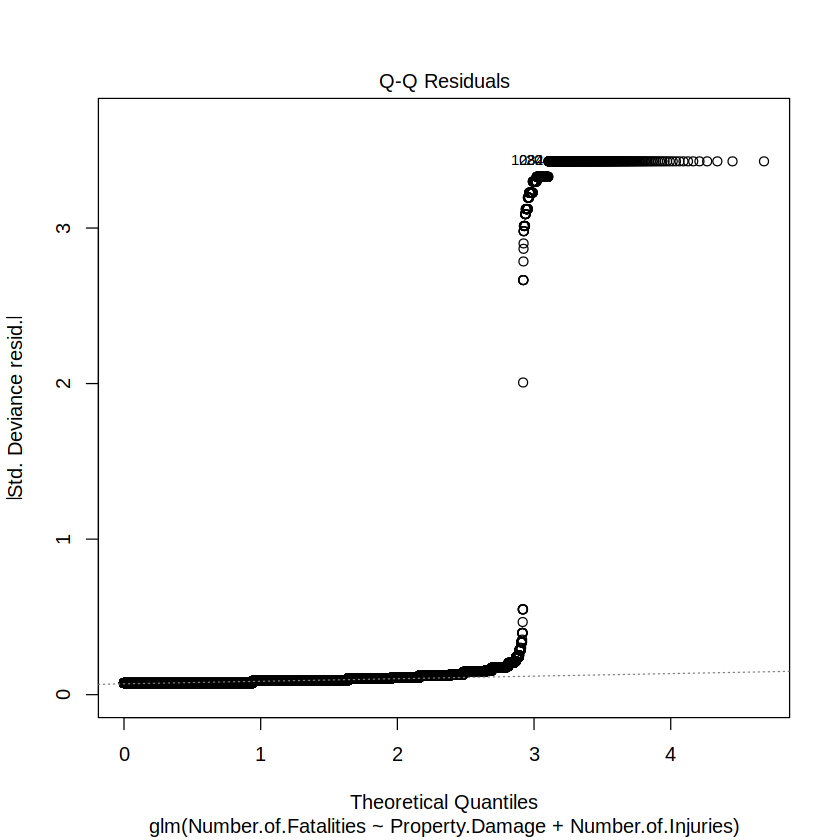

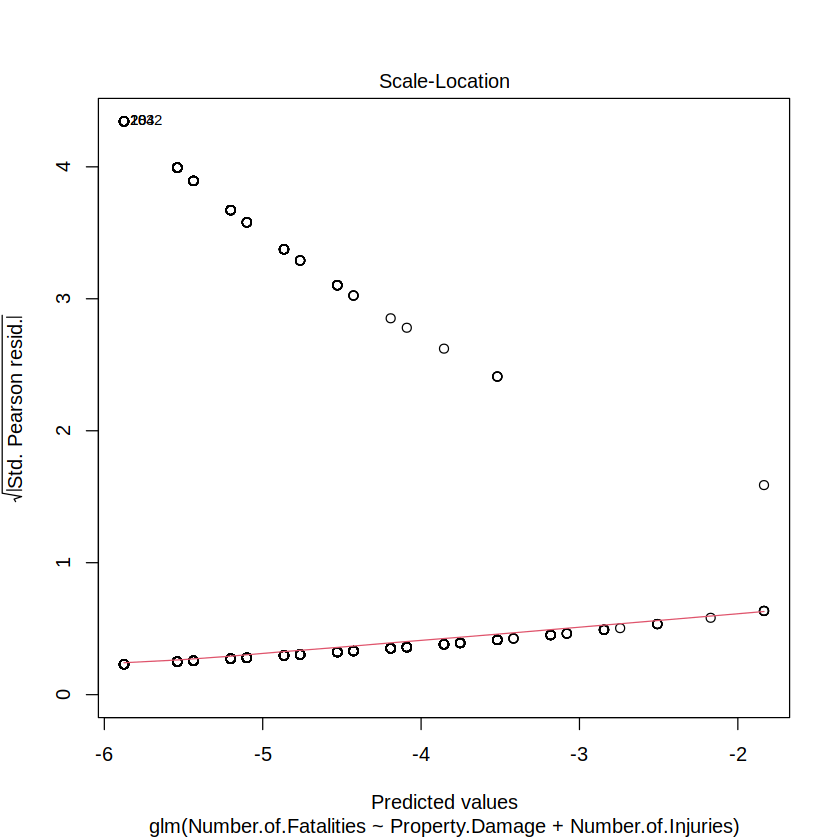

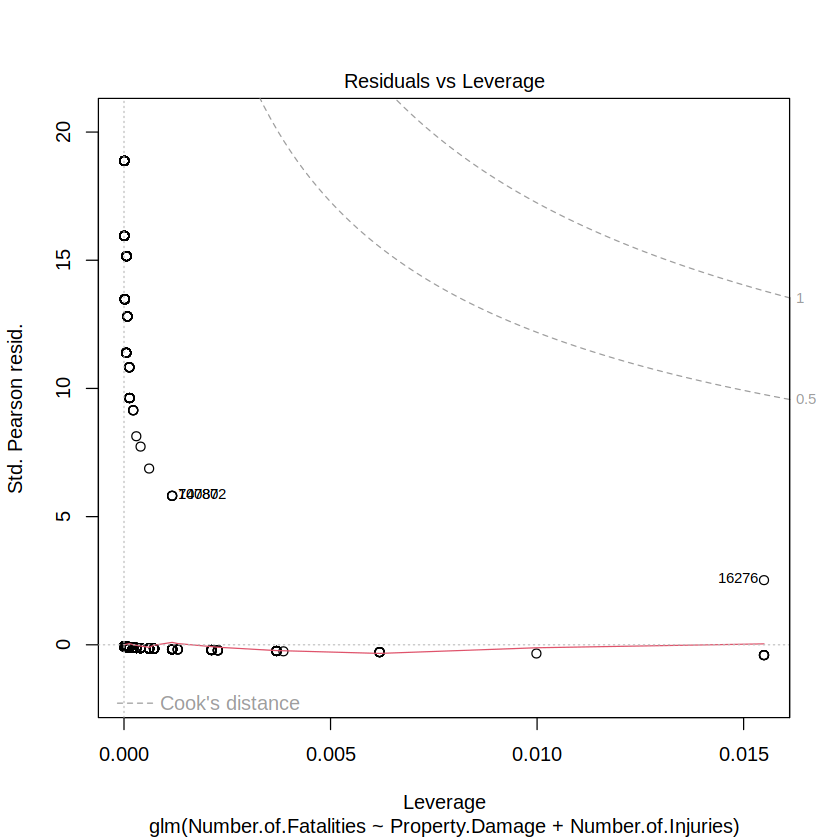

In [174]:
plot(fatality_glm)

Warning message:
“not plotting observations with leverage one:
  4, 158859, 176323”


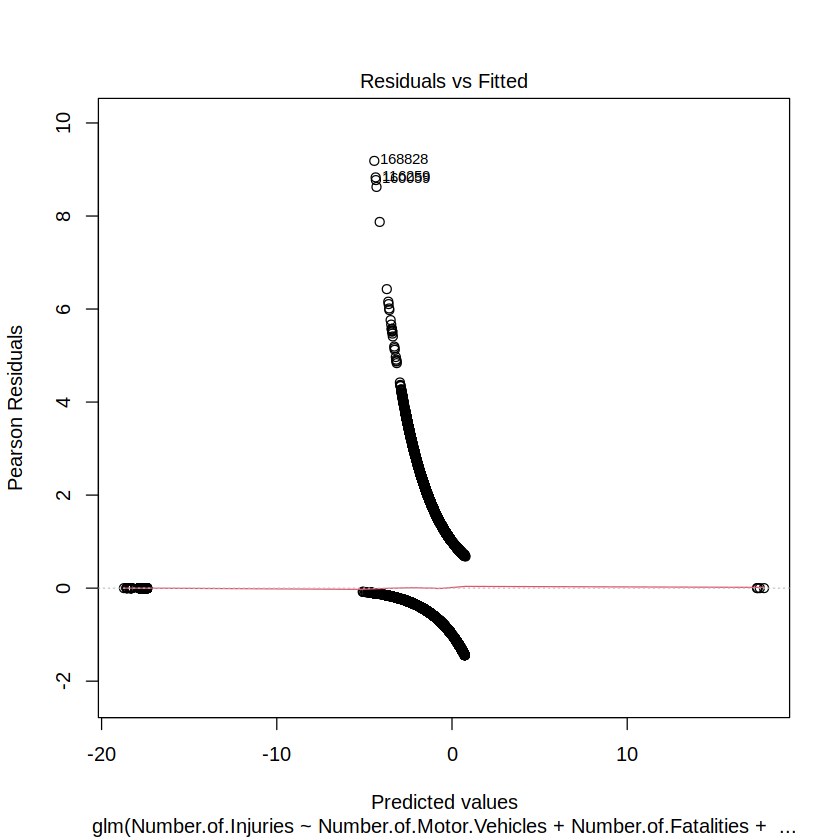

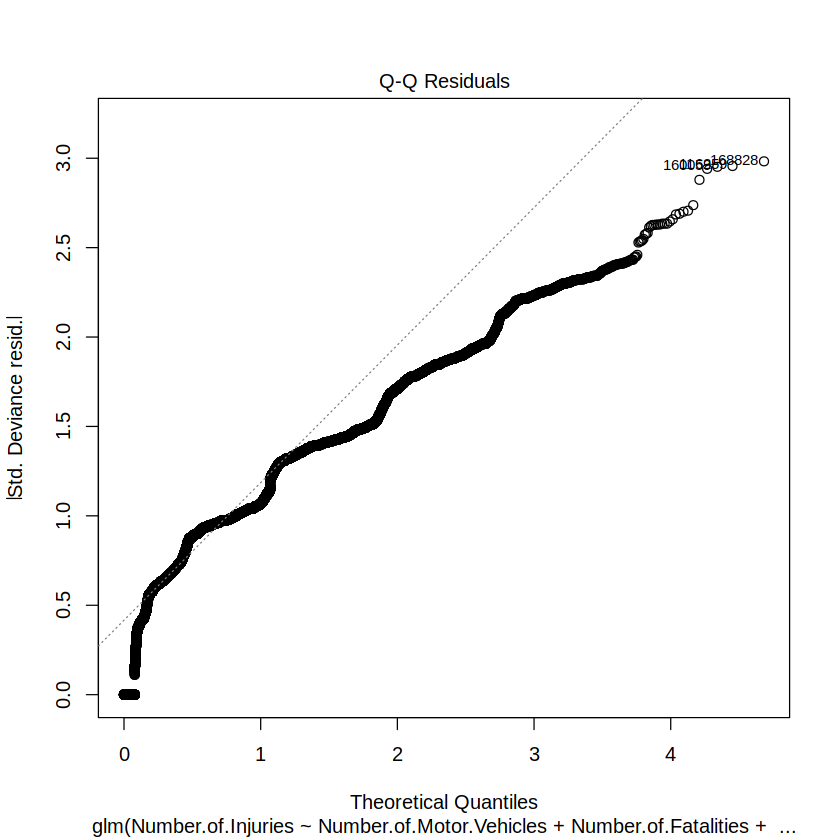

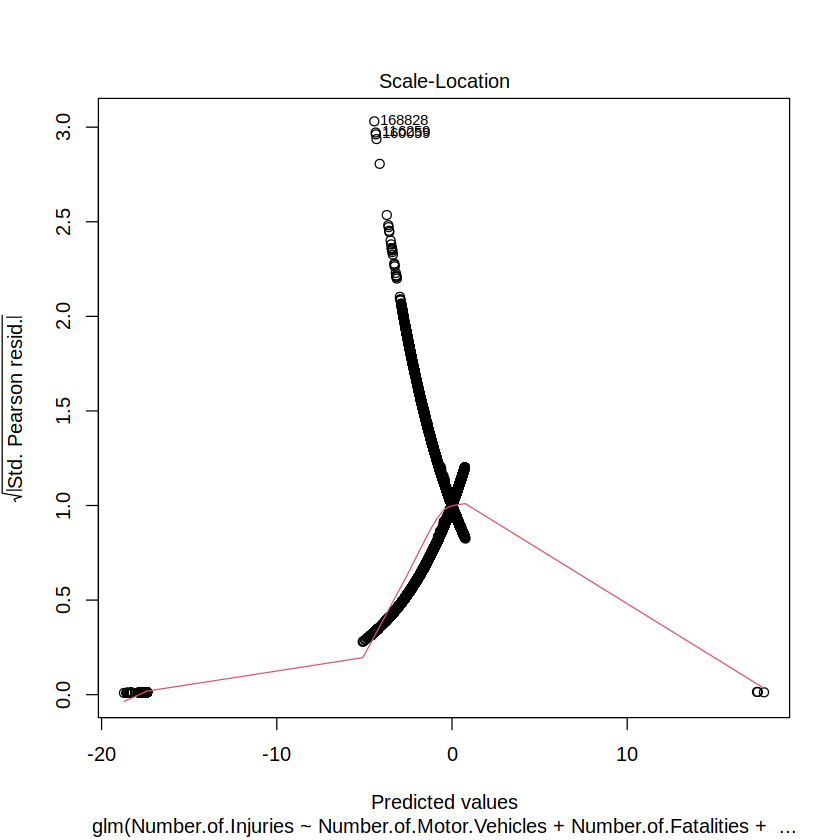

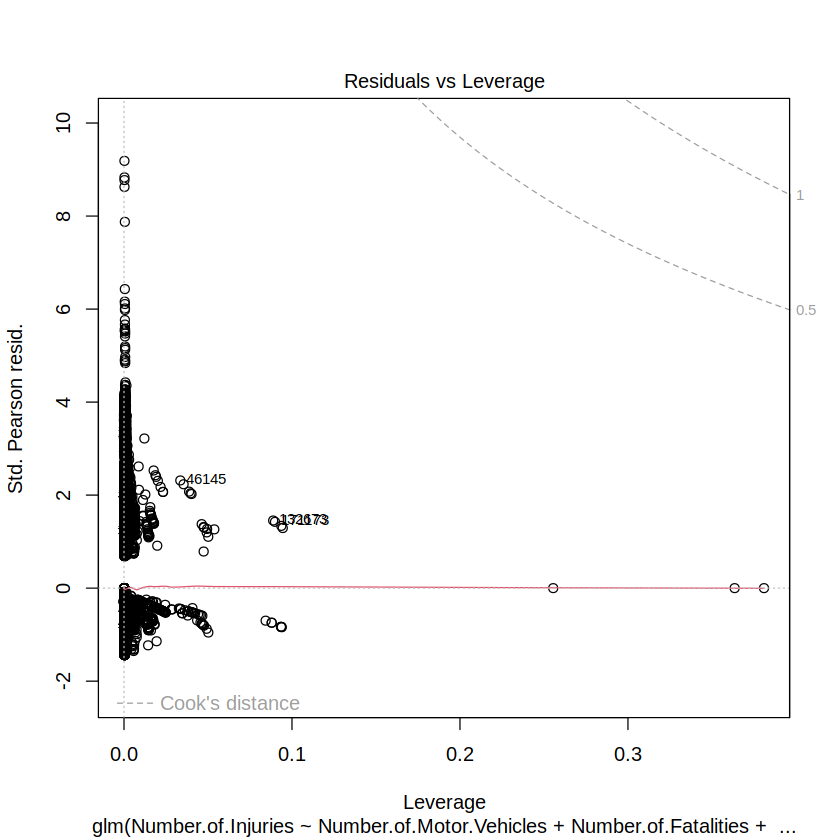

In [175]:
plot(injury_glm)

In [176]:
library("ggplot2")

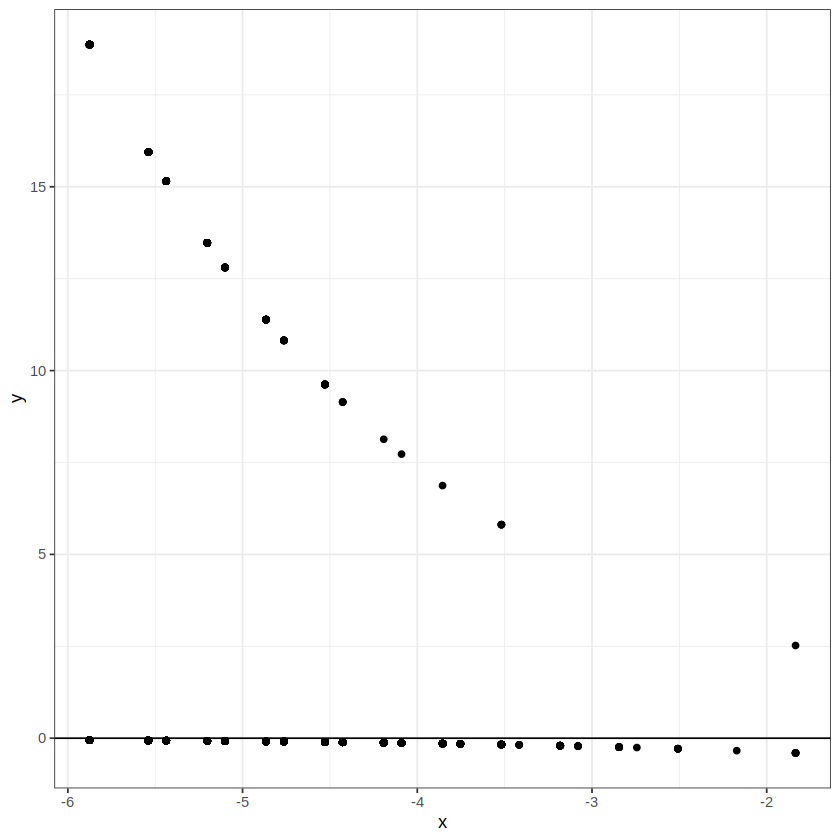

In [177]:
df = data.frame(x = predict(fatality_glm, type ="link"), y = stdres(fatality_glm))
ggplot(df, aes(x = x, y = y)) +
    geom_point() +
    theme_bw() +
    geom_hline(yintercept = 0)

Warning message in sqrt((n - p - sr^2)/(n - p - 1)):
“NaNs produced”


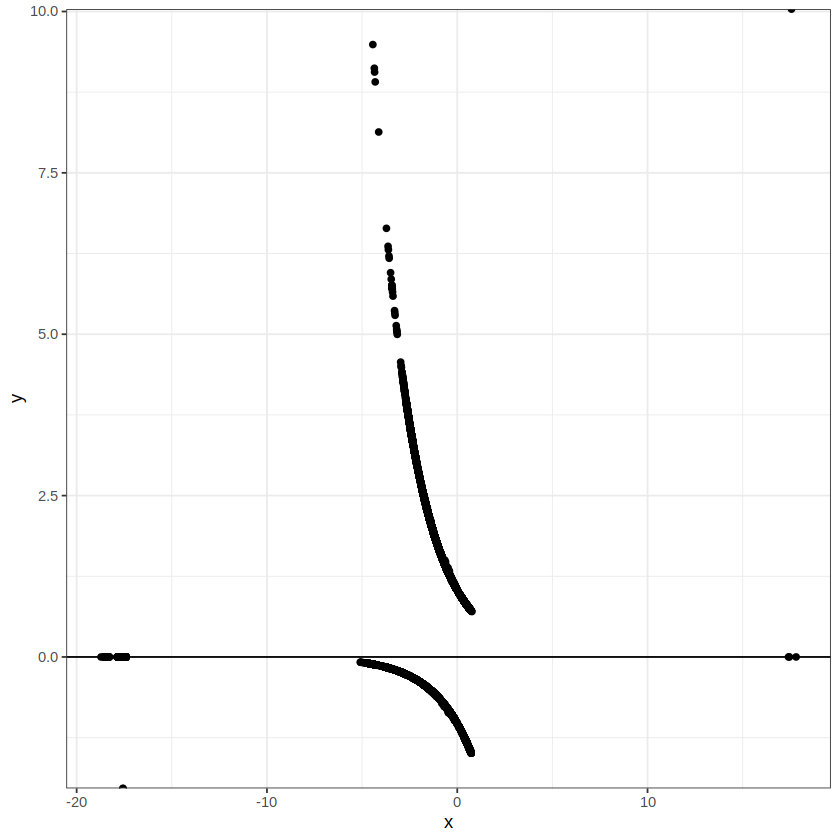

In [178]:
df = data.frame(x = predict(injury_glm, type ="link"), y = stdres(injury_glm))
ggplot(df, aes(x = x, y = y)) +
    geom_point() +
    theme_bw() +
    geom_hline(yintercept = 0)

For my project I ended up analyzing (creating regressions for) a data set of car crashes in Nashville and the surrounding areas from 2018 to April 2025.  The set contained information on the date, number of vehicles, number of injuries, number of fatalities, if property damage occurred, if the accident was a hit and run, weather description, street address, precinct, descriptions of the accident, and more.  I narrowed my predictors and responses down to 9 of the 27 original columns of information.  My response variables are the number of fatalities and number of injuries for my multi-linear regressions and injury occurrence or fatality occurrence for my logistic regressions.  Because most of my response variables are descriptions of weather, light conditions, locations and so on, I decided to encode the majority of my responses as factors (categorical).  I then looked at the original multi-linear models and logistic regression models, and removed the predictor categories that had very little statistical significance (I did this by looking at the p value and removing categories with very high p values across their outcomes).  After this, I preformed a variety of tests (on my multi-linear models) starting with vif, which weeds out predictor variables with high collinearity.  Because my highest vif score was 5, I decided to leave the variable in and not remove it.  Next I moved on to model selection, with the ols_step_best_subset function, which returns the best models based on $R^2$ given the number of predictors (as well as adj$R^2$ and AIC along with more information).  After graphing the number of predictors vs AIC and number of predictors vs $R^2$ for both my fatality and injury multi-linear models, I found that more features minimized AIC and Maximized adjusted $R^2$ for both multi linear models.  Then I moved on to partial F tests for my mlr models and chi squared tests for my glm models.  I took my reduced model and added back one feature from the full 9 features and did this for each feature I removed.  In all cases (both the chi squared and F tests) I found that we rejected the null hypothesis (that is that the feature removed is 0) and thus I believe I was a little to eager to remove features from my full models (in terms of finding a good model that accurately predicts the outcome).  Then I went on to plot my linear models to analyze the assumptions made when constructing regressions of all types.  For my fatality mlr the variance is only positive which is really strange considering it should be normally scattered around 0, the Q-Q plot looks to be okay until the end were it jumps and vastly overestimates, and the leverage is strange but I don't seem to have outliers that are a big effect on the data.  For my injury mlr the residuals once again are extremely positive, the Q-Q plot is almost entirely an overestimate, and no points seem to be extreme outliers.  The plots of the fatality glm so positive residuals again, with the Q-Q plot overestimating, and no extreme outliers.  And finally for the injury glm the residuals have a really strange shape with both positive and negative points, an underestimation for the Q-Q plot, and no outliers with a lot of leverage.  In all, I'm a little disappointed that I wasn't able to find a model I believe to be good (enough) at prediction injury or fatality (occurrence and number) and my project turned into an exploration of the models I created rather than an optimization of the models.  I did however learn that much of the data I had was useful, and if given more time (and help), I believe I could create a good model that gives us insight into the prevention of injury or death in car accidents.  